In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [272]:
# задаем схемы

def schema_1(y, sigma):
    return y - sigma * (y - np.roll(y, 1))

def schema_2(y, sigma):
    return y - (np.roll(y, -1) - np.roll(y, 1)) / 2 * sigma + sigma ** 2 / 2 * (np.roll(y, -1) - 2 * y + np.roll(y, 1))

schemas = (schema_1, schema_2)

In [273]:
# начальные условия
def condition(x):
    return np.sin(4 * np.pi * x / 20)

In [274]:
# функция для рисования графиков
def draw_3D_plot(h, sigma, T, u, schema):
    tau = h * sigma
    fig = plt.figure()
    plt.title(f"h = {h}, tau = {tau}, {schema}")
    ax = plt.axes(projection='3d')
    ax.contour3D(np.array([i * h for i in range(int(L / h))]), np.array([i * tau for i in range(int(T / tau))]), u, 100, )
    ax.view_init(30, 90)


In [275]:
T = 18
h = 0.5
L = 20

# схема

def method(h, sigma, T, schema):
    x = np.linspace(0, L, int(L / h) + 1)
    tau = h * sigma
    u_0 = condition(x)
    u = np.array([u_0] * int(T / tau))

    for i in range(1, int(T / tau)):
        u[i] = schema(u[i - 1], sigma)
    u = u[:, :-1]
        
    return u

def get_plot(h, sigma, T, schema, schem_title):
    sol = method(h, sigma, T, schema)
    draw_3D_plot(h, sigma, T, sol, schem_title)
    return sol
    

[[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]


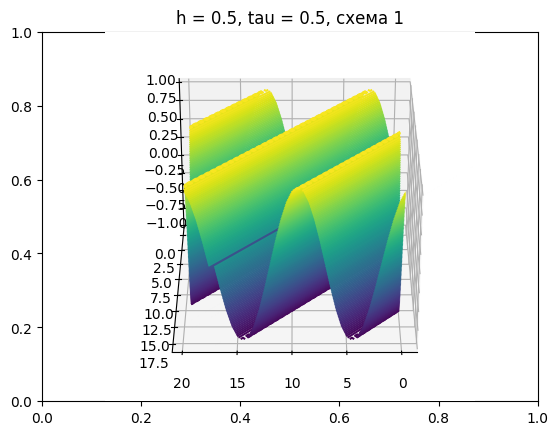

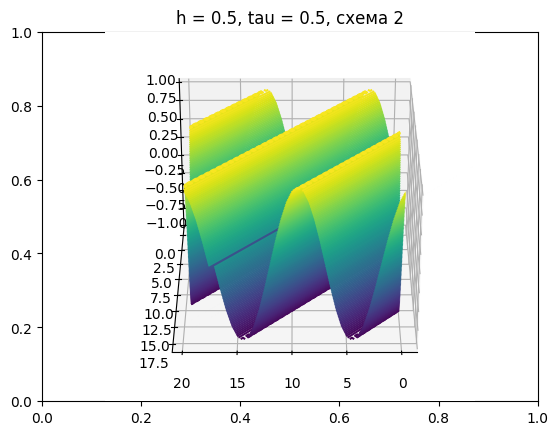

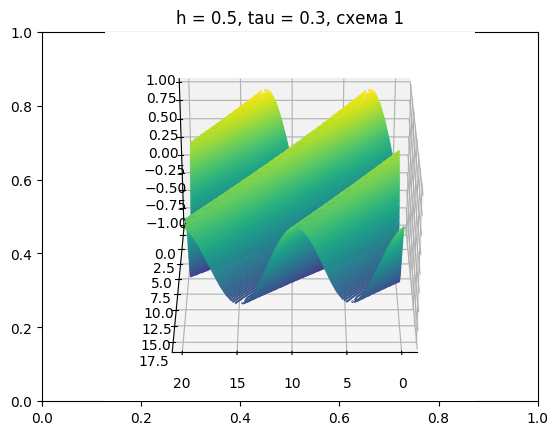

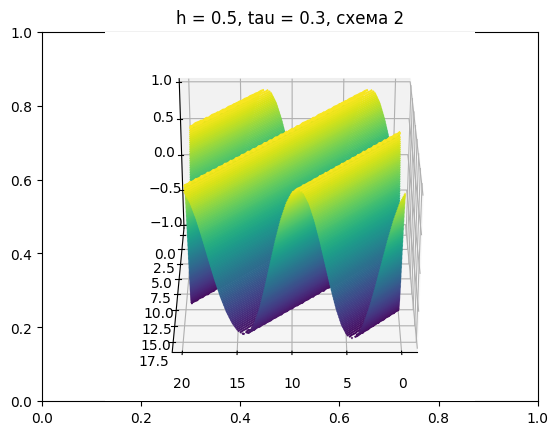

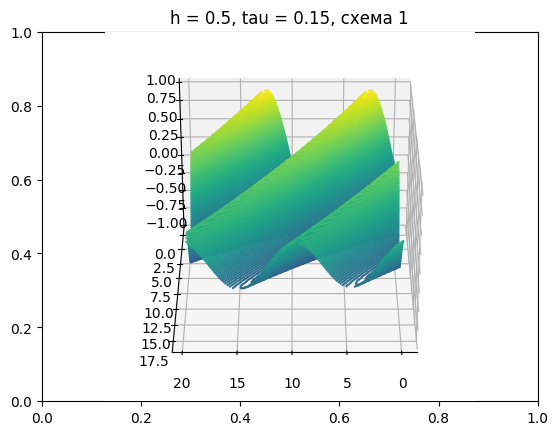

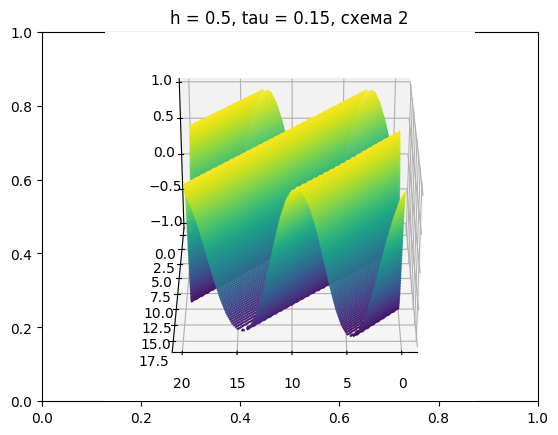

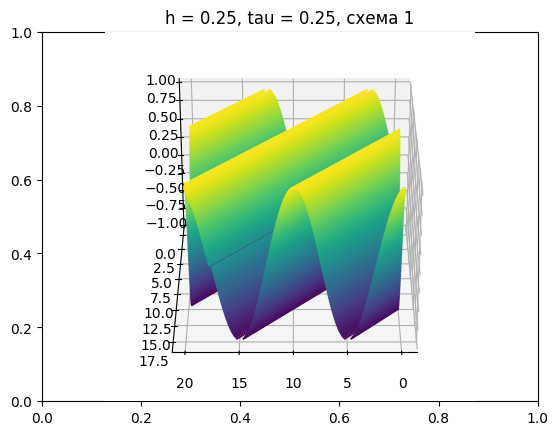

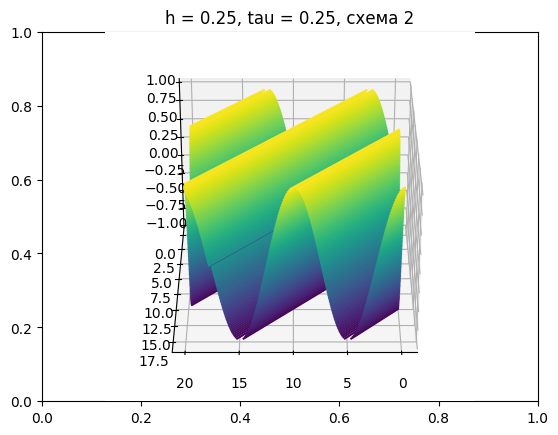

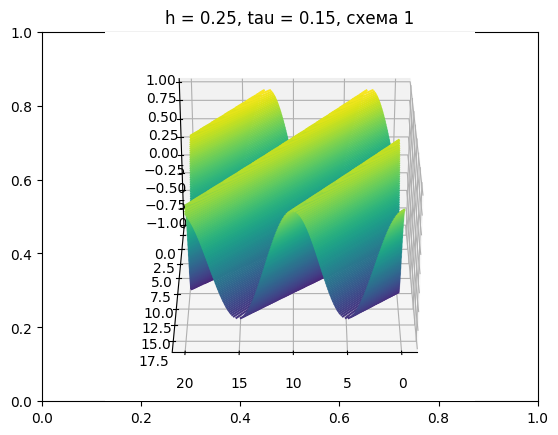

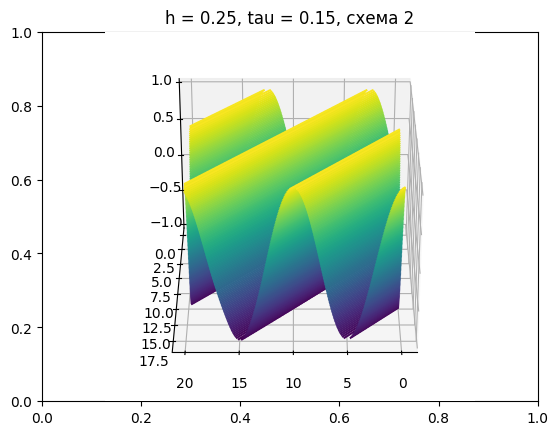

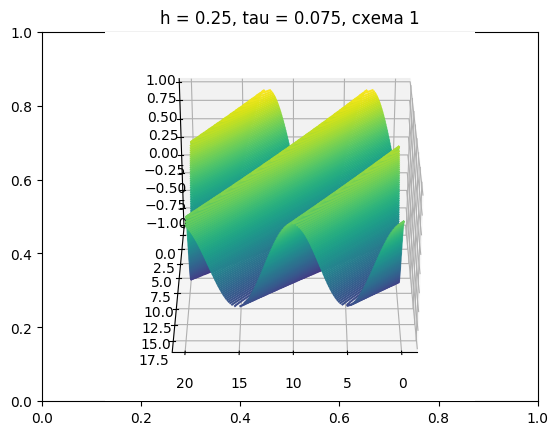

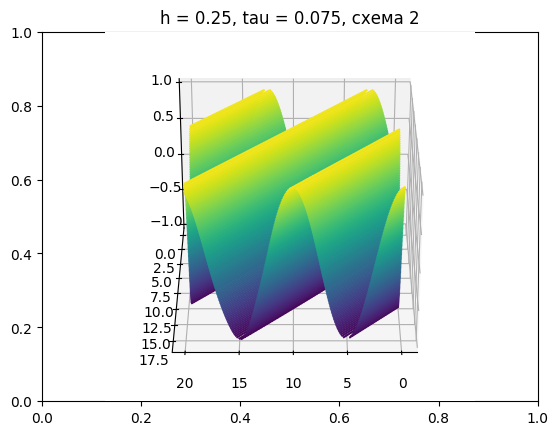

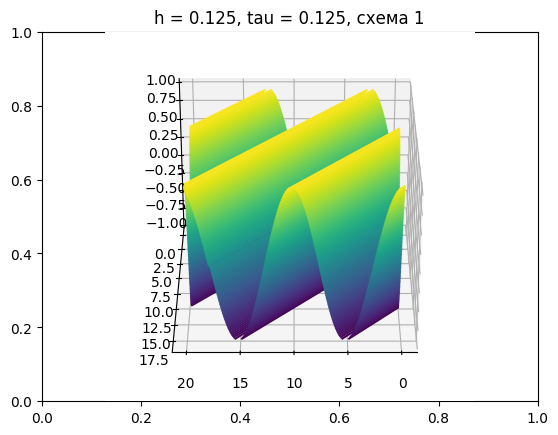

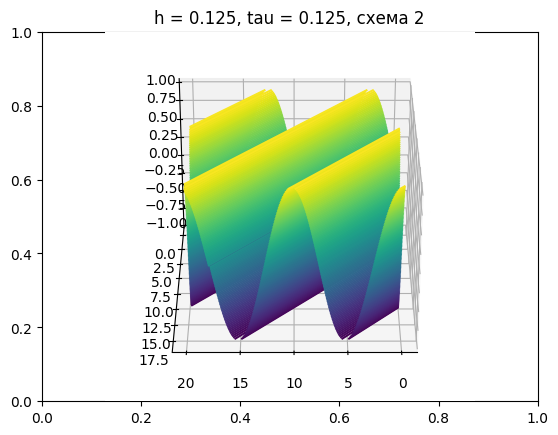

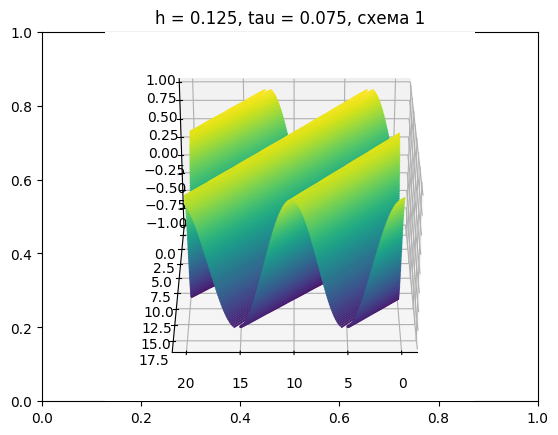

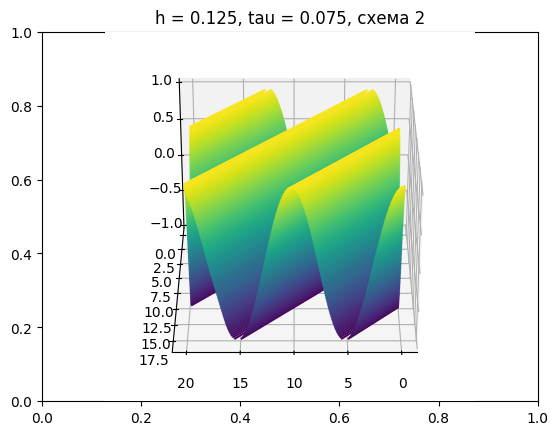

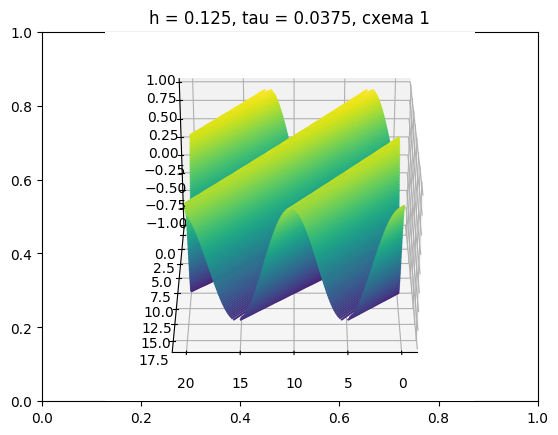

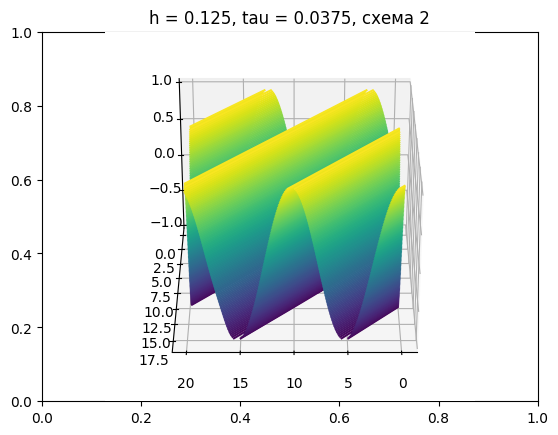

In [276]:
solutions = [[[0 for i in range(3)] for j in range(3)] for k in range(2)]

print(solutions)

# получаем решения и строим графики
for j, h_i in enumerate((h, h / 2, h / 4)):
    for k, sigma_i in enumerate((1, 0.6, 0.3)):
        for i, schema in enumerate(schemas):
            arr = get_plot(h_i, sigma_i, T, schema, f"схема {str(i + 1)}")
            solutions[i][j][k] = np.array(arr)

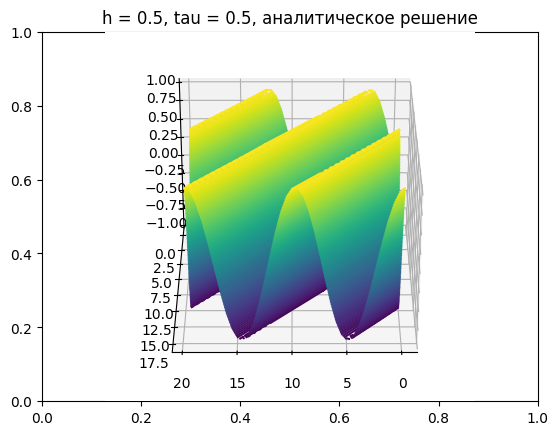

In [277]:
# аналитические решение
def analitical_solution(x, t):
    return condition(x - t)


def get_analitical_solution(h, sigma):
    x = np.linspace(0, L, int(L / h))
    tau = h * sigma
    u_0 = condition(x)
    u = np.array([u_0] * int(T / tau))
    for i in range(1, int(T / tau)):
        u[i] = analitical_solution(x, i * tau)
    return u
        
u = get_analitical_solution(0.5, 1)
draw_3D_plot(0.5, 1, T, u, "аналитическое решение")

In [278]:
# отличение анадитического решение от висленного по норме

for i in range(3):
    print(np.max(np.abs(solutions[0][i][0] - get_analitical_solution(0.5 / 2 ** (i), 1))))

print()

for i in range(3):
    print(np.max(np.abs(solutions[1][i][0] - get_analitical_solution(0.5 / 2 ** (i), 1))))

0.30901699437494745
0.15643446504023173
0.07845909572784539

0.3090169943749475
0.15643446504023176
0.07845909572784539


видно что в обоих случаях аппроксимация линейная по h

#### 